In [154]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy.interpolate import griddata
from numpy.random import uniform, seed
from matplotlib import cm
np.random.seed(1234)

n = 100
X = np.random.normal(size=(n, 2))

In [155]:
def gen_label(X):
    return np.random.binomial(1, 1.0 / (1.0 + np.exp(-np.matmul(X, (-2.0, 1.0)))))

In [156]:
def IRLS(X, y):
    weight = np.zeros(shape=(2))
    bias = np.log(np.mean(y) / (1.0 - np.mean(y)))
    #print(bias)
    threshold = 1e-6
    change = 1e6
    while(change >= threshold):
        ita = np.matmul(X, weight) + bias
        #print(ita)
        miu = 1.0 / (1.0 + np.exp(-ita))
        #print(miu)
        s = np.multiply(miu, 1.0 - miu)
        z = ita + (y - miu) / s
        #print(s, z)
        s = np.diag(s).copy()
        XTSX_inv = np.linalg.inv(np.matmul(np.matmul(np.transpose(X), s), X))
        XTSz = np.matmul(np.matmul(np.transpose(X), s), z)
        weight_new = np.matmul(XTSX_inv, XTSz)
        change = np.linalg.norm(weight_new - weight)
        weight = weight_new
    return weight

In [157]:
def get_fisher_information(X, beta):
    prob = 1.0 / (1.0 + np.exp(-np.matmul(X, (-2.0, 1.0))))
    w = np.multiply(prob, 1 - prob)
    w = np.diag(w).copy()
    return np.matmul(np.matmul(np.transpose(X), w), X)

In [158]:
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings("error")
    
def plot_new(X, weight, area):
    func_z = multivariate_normal(mean=np.asarray((-2, 1)), cov=np.linalg.inv(get_fisher_information(X, (-2,1))))
    xlist = np.linspace(area[0], area[1], 100)
    ylist = np.linspace(area[2], area[3], 100)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.empty(shape=X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = func_z.pdf([X[i][j], Y[i][j]])
    # note that countors in two graphs are different w.r.t. levels
    try:
        levels = [(1 << i) for i in range(1, 11)]
        plt.contour(X, Y, Z, levels, colors='k')
        plt.scatter(weight[:, 0], weight[:, 1])
        plt.show()
    except:
        levels = [i / 5 for i in range(1, 11)]
        plt.contour(X, Y, Z, levels, colors='k')
        plt.scatter(weight[:, 0], weight[:, 1])
        plt.show()
        

In [159]:
weight = np.empty(shape=(n, 2))
for i in range(100):
    y = gen_label(X)
    weight[i] = IRLS(X, y)

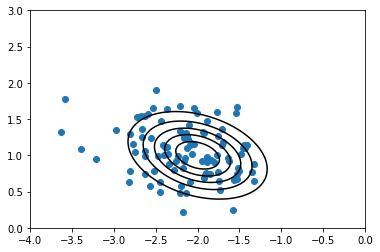

In [160]:
plot_new(X, weight, area=[-4.,0.,0.,3.])

In [161]:
n = 10000
X = np.random.normal(size=(n, 2))
weight = np.empty(shape=(100, 2))
for i in range(100):
    y = gen_label(X)
    weight[i] = IRLS(X, y)

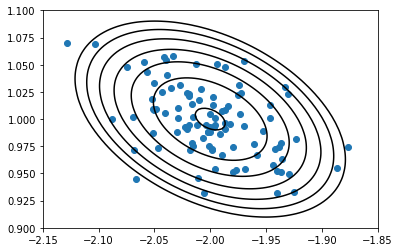

In [162]:
plot_new(X, weight, area=[-2.15, -1.85, 0.9, 1.1])